In [1]:
import pickle

from sklearn.model_selection import train_test_split
from wbn.classifier import WBN
from wbn.object import Document, DocumentData, Documents

In [2]:
# Load dataset
with open("../data/pr-newswire.pickle", "rb") as infile:
    raw_data = pickle.load(infile)

# De-structure 'data' and 'target'
data = raw_data.get("data")
target = raw_data.get("target")

# Construct Document's for each data/target entry
pr_newswire = Documents(
    [
        Document(DocumentData(paragraphs, keywords), target[idx])
        for idx, (paragraphs, keywords) in enumerate(data)
    ]
)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    pr_newswire.data, pr_newswire.target, test_size=0.2
)


In [3]:
# Build WBN
wbn = WBN()

# Fit WBN Model
wbn.fit(x_train, y_train)

[Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10e728040>, cls='equity-offering', corpus=['announc', 'intent', 'base', 'accomplish', 'approv', 'commenc', 'final', 'proce', 'transact', 'class', 'combin', 'stock', 'sold', 'success', 'term', 'applic', 'trade', 'offer', 'close', 'separ', 'propos', 'addit', 'newli', 'regist', 'issu', 'purchas', 'solicit', 'allot', 'global', 'complet', 'anticip', 'bookrunn', 'registr', 'ipo', 'initi', 'equiti', 'share', 'effect', 'underwritten', 'placement', 'book', 'underwrit', 'runner', 'secondari', 'rang', 'financ', 'launch', 'public', 'negoti', 'payabl', 'issuanc', 'list', 'expect', 'consumm', 'upsiz', 'offici', 'matur', 'privat', 'exchang', 'alloc', 'total', 'file', 'price', 'prospectu', 'deal', 'busi', 'unit', 'result', 'size', 'relat']),
 Classification(dag=<networkx.classes.digraph.DiGraph object at 0x10e6ce7f0>, cls='merger-acquisition', corpus=['valu', 'closur', 'consid', 'announc', 'intent', 'tender', 'divestitur', 'amend', 'bas

In [4]:
# Predict
pred = wbn.predict(x_test)

# Reverse encode classes
y_pred = wbn.reverse_encode(target=pred)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    recall_score,
    precision_score,
)

In [6]:
c_matrix = confusion_matrix(y_test, y_pred)

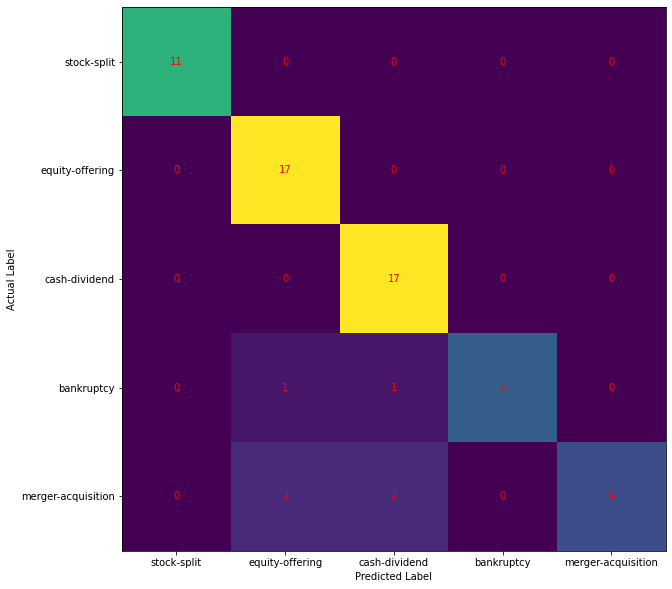

In [7]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(c_matrix)

ax.set_ylabel("Actual Label")
ax.set_xlabel("Predicted Label")
labels = tuple(wbn.reverse_encode([0, 1, 2, 3, 4]))
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=labels)
for i in range(len(labels)):  # ref: (https://realpython.com/logistic-regression-python/)
    for j in range(len(labels)):
        ax.text(j, i, c_matrix[i, j], ha='center', va='center', color='red')

In [8]:
# Calculate key metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Precision Score: 0.9149999999999999
Recall Score: 0.9
F1 Score: 0.8901651651651652
